# Visualization of reliability results

In this example, we demonstrate how to visualize the results of a reliability method. The `form` method is used to estimate the probability of levee failure due to the piping mechanism. This failure mechanism is characterized using the model of Bligh.

### Define model

First, we import the necessary packages:

In [1]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod
import numpy as np

We import the limit state function:

In [2]:
from utils.models import bligh

To perform a reliability analysis, we create a reliability project and define the limit state function (model):

In [3]:
project = ReliabilityProject()
project.model = bligh
project.model.print()

Model bligh:
Input parameters:
  m
  L
  c_creep
  delta_H
Output parameters:
  Z


We assume the following distributions for the parameters $m$, $L$, $c_{creep}$ and $\Delta H$:

In [4]:
project.variables["m"].distribution = DistributionType.log_normal
project.variables["m"].mean = 1.76
project.variables['m'].deviation = 0.1

project.variables["L"].distribution = DistributionType.normal
project.variables["L"].mean = 50
project.variables["L"].deviation = 2.5

project.variables["c_creep"].distribution = DistributionType.deterministic
project.variables["c_creep"].mean = 18

project.variables["delta_H"].distribution = DistributionType.gumbel
project.variables["delta_H"].shift = 0.53
project.variables["delta_H"].scale = 0.406

### Perform reliability calculations with FORM

The reliability analysis is executed using `project.run()`, and the results can be accessed via `project.design_point`. To gain insight into the results, we save the realizations.

In [5]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 50
project.settings.variation_coefficient = 0.02
project.settings.save_realizations = True
project.settings.save_convergence = True

project.run()
project.design_point.print()

Reliability (FORM)
 Reliability index = 3.9965373791131387
 Probability of failure = 3.2137868280268445e-05
 Convergence = 0.00935057558814305 (converged)
 Model runs = 20
Alpha values:
 m: alpha = 0.14938850556149258, x = 1.6986045209809717
 L: alpha = 0.13474343776015188, x = 48.65373203600337
 c_creep: alpha = 0.0, x = 18.0
 delta_H: alpha = -0.9795546336915977, x = 4.591472192733117



### Visualize reliability index and failure probability

Using the `plot_convergence()` method, we can plot the reliability index ($\beta$) and failure probability, corresponding to different model runs:

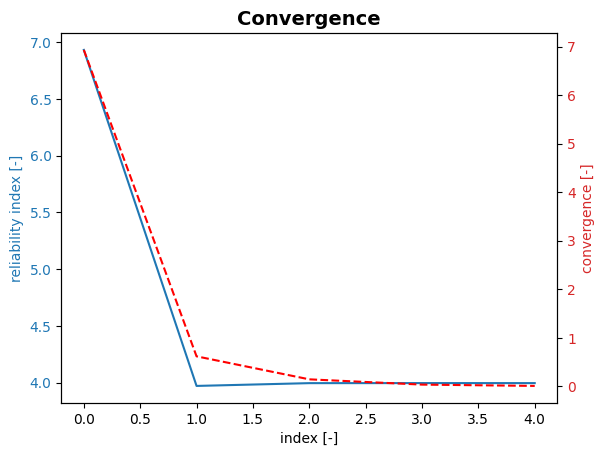

In [6]:
project.design_point.plot_convergence()

### Visualize contribution of random variables

Using the `plot_alphas()` method, we can visualize the contributions of random variables ($\alpha^2$) in a pie chart:

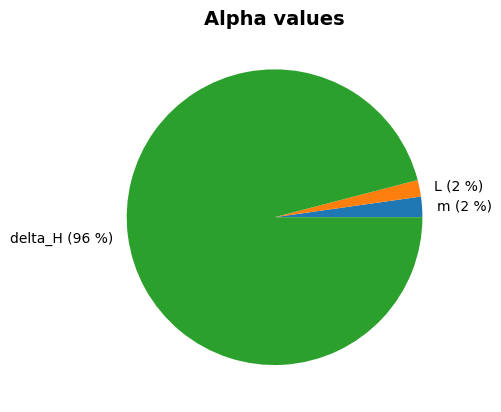

In [7]:
project.design_point.plot_alphas()

### Visualize Z = 0 and design point

Using the `plot_realizations()` method, we can visualize $Z=0$ and the design point in a two-dimensional space. To do this, we need to specify two variables that define the axes:

* The given variable on the $x$-axis (`given_variable`)
* The variable to be determined on the $y$-axis (`find_variable`)

For all other variables, the design point values will be used.

The user must specify the range over which the given variable is considered (`given_variable_range`). For each value from `given_variable_range`, the value of `find_variable` that results in $Z=0$ is determined using the bisection method. This method requires defining a search interval by specifying `start_interval` and `end_interval`.

Ideally, `Z(start_interval)` and `Z(end_interval)` should have opposite signs. If this condition is not met, a warning is issued.

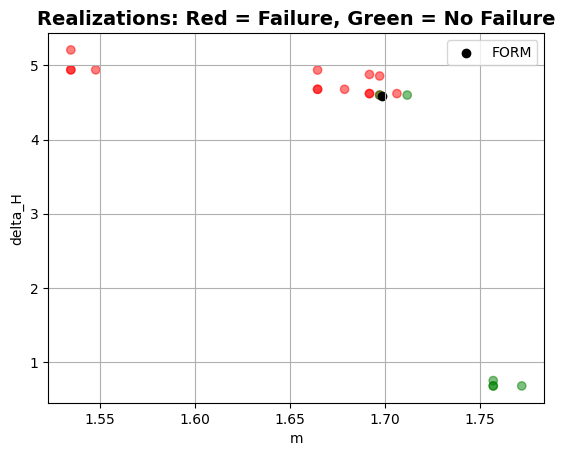

In [8]:
project.design_point.plot_realizations()